In [90]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [91]:
import numpy as np
import pandas as pd

In [92]:
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [93]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

from flask import Flask, jsonify, render_template

In [94]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [95]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [96]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [97]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [98]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [99]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_datetime = datetime.strptime(last_date[0], '%Y-%m-%d')
last_date

('2017-08-23')

In [100]:
yeardate = (last_datetime - dt.timedelta(days=1*365)).strftime("%Y-%m-%d")
yeardate

'2016-08-23'

In [101]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date = datetime.strptime(last_date[0], '%Y-%m-%d')

yeardate = (last_date - dt.timedelta(days=1*365)).strftime("%Y-%m-%d")

# Perform a query to retrieve the data and precipitation scores
p_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= yeardate).\
    filter(Measurement.date <= last_date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(p_data).set_index('date')
# Sort the dataframe by date
precip_df = precip_df.sort_values(by='date').dropna()
# Inspect the data
precip_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


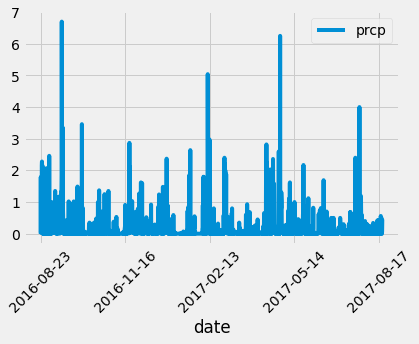

In [102]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(rot=45)
plt.show()

In [103]:
# Use Pandas to calcualte the summary statistics for the precipitation data
index_p = ['min','max','avg']
p_stats = pd.DataFrame([precip_df.min(), precip_df.max(), precip_df.mean()], index=index_p)
p_stats

,prcp
min,0.000000
max,6.700000
avg,0.177279


In [104]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.id).count() 
print(f'The Dataset has {stations} stations.')

The Dataset has 9 stations.


In [105]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station).label('cnt')).\
        group_by(Measurement.station).order_by(desc('cnt')).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [117]:
# Most Active station
active_station = session.query(Measurement.station, func.count(Measurement.station).label('cnt')).\
        group_by(Measurement.station).order_by(desc('cnt')).first()
active_station

('USC00519281', 2772)

In [118]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station == active_station[0]).all()

[(54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

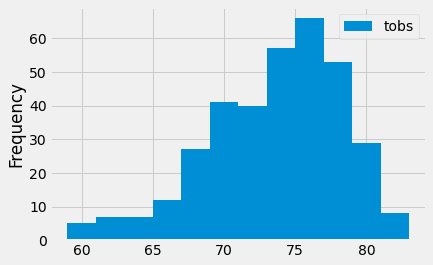

In [107]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
resultset = session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.date >= yeardate).\
                        filter(Measurement.date <= last_date).\
                        filter(Measurement.station == active_station[0]).all()
# convert to dataframe
results_df = pd.DataFrame(resultset)

# historgram 
results_df.plot.hist(bins=12)

## Bonus Challenge Assignment

In [108]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [109]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [110]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [111]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [112]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [113]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [114]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [115]:
# Plot the daily normals as an area plot with `stacked=False`
